# Hypothesis Testing

## About Dataset
Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.
Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

How you can help here?

The company wants to know:

Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
How well those variables describe the electric cycle demands?

## Steps
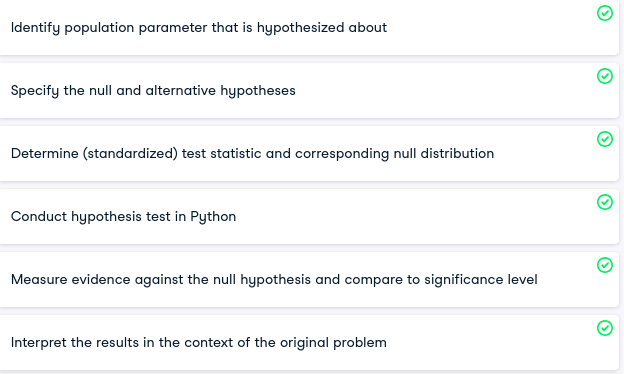

## What to test:
1. Wether working day has effect on number of electric cycles rented

2. Whether no. of cycles rented similar or different in different seasons

3. Whether no. of cycles rented similar or different in different weather

4. Weather is dependent on season? (check between 2 predictor variable)


### Tips
- Set up Null Hypothesis (H0) State the alternate hypothesis (H1) Check assumptions of the test (Normality, Equal Variance). You can check it using Histogram, Q-Q plot or statistical methods like levene’s test, Shapiro-wilk test (optional)

- Please continue doing the analysis even If some assumptions fail (levene’s test or Shapiro-wilk test) but double check using visual analysis and report wherever necessary

- Set a significance level (alpha) Calculate test Statistics. Decision to accept or reject null hypothesis. Inference from the analysis

### Initial Thoughts

1. All tests will be done based from the questions to be answered will be a **two-tailed test**. The aim is to identify if any of the variables will produce a *difference* versus another variable.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


None

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


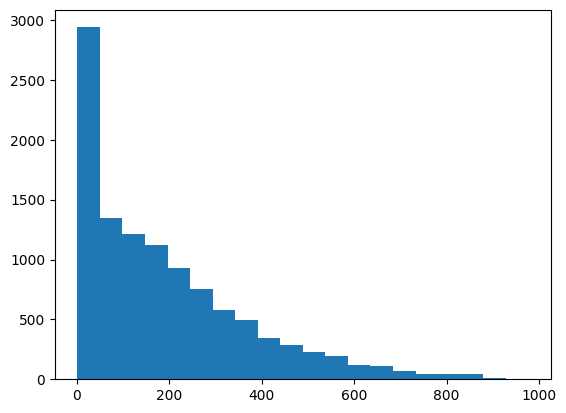

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

data = pd.read_csv('Datasets/Hypothesis_Test/yulu_bike_sharing_dataset.csv')
display(data.info())
display(data.head())

plt.hist(data['count'],bins=20) #skewed to the left. Median is a better summary statistic than the mean.
plt.show()

# Test 1

- $H_0$: The average number of rentals is the same on working and non-working days.
    - $\mu_0 - \mu_1 = 0$
- $H_a$: The average number of rentals is different on working and non-working days.
    - $\mu_0 - \mu_1 \neq 0$

- The test will use **two-sample t-test**. After running the code below, it was discovered that the **mean** is always used for t-test. 

In [ ]:

# Calculate groupwise summary staistics (median)
median = data.groupby('workingday')['count'].median()
mean = data.groupby('workingday')['count'].mean() # will be reported with the median

median_0 = median[0]
median_1 = median[1]

mean_0,mean_1 = mean

std_0, std_1 = data.groupby('workingday')['count'].std()
n_0,n_1 = data.groupby('workingday')['count'].count()

#print(median_0, std_0,n_0)
#print(median_1, std_1,n_1)

#num = median_1 - median_0
num = mean_1 - mean_0
den = np.sqrt((std_0**2/n_0) + (std_1**2/n_1))
t_stat = num/den
print(f"t-score: {t_stat}")


# To check for correctness, we do it again using scipy
t_stat_1, p_val = ttest_ind(data[data['workingday']==0]['count'], data[data['workingday']==1]['count']) # Uses the mean. Distribution is skewed
print(f"Actual t-score: {t_stat_1}")

t-score: 1.2362580418223228
Actual t-score: -1.2096277376026694


10886
